# Exploring the "Prosper Loan Data"
## by (Elsie Okoli)

## Introduction
Prosper is a Credit Facility company, this dataset contains information on loans facilitated by the organisation.op

  
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns



%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load the dataset
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Check the structure of the data using some basic panda function for description
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### What is the structure of your dataset?

>The prosper loan dataset is structurally loaded as it contains 113,937 and 81 rows and columns respectively.
It has within its frame; integer, boolean, string, float data type and most of the variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

>I want to understand the default rate within prospers customer and its relationship with their customers debt to income ratio

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>The time the loan was opened and the day it was closed would be of immense help and insight.

## Univariate Exploration


In [3]:
#Make first a copy of the original dataset
loan_df = loan.copy()

In [4]:
#Choose specific target columns that speaks to the area of interest that i am trying to explore as described above
#df2 = df[['b','c','d','e','f']]

loan2 = loan_df[['ListingKey', 'LoanOriginalAmount','LoanOriginationDate', 'ListingNumber','CreditGrade','ListingCreationDate','LoanStatus', 'Term', 'DebtToIncomeRatio','BorrowerRate','LenderYield','BorrowerAPR', 'EmploymentStatus', 'Occupation', 'BorrowerState','Term', 'IncomeRange','IncomeVerifiable', ]]


In [5]:
#Check for duplicates
loan2.ListingKey.nunique()

113066

In [6]:
loan2[loan2.ListingKey.duplicated() == True].count()['ListingKey']

871

In [7]:
loan2.drop_duplicates(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
loan2.shape

(113066, 18)

In [22]:
#pivot_df = pd.pivot_table(df, index =['coulmn1','coulmn2'])
#loan2= pd.pivot_table(loan_df, index =['ListingKey', 'LoanOriginalAmount','LoanOriginationDate', 'ListingNumber','CreditGrade','ListingCreationDate','LoanStatus', 'Term', 'DebtToIncomeRatio','BorrowerRate','LenderYield','BorrowerAPR', 'EmploymentStatus', 'Occupation', 'BorrowerState','Term', 'IncomeRange','IncomeVerifiable'])

In [6]:
#drop all empty columns
#loan_2 = loan1.dropna(subset=['ListingKey', 'LoanOriginalAmount','LoanOriginationDate', 'ListingNumber','CreditGrade','ListingCreationDate','LoanStatus', 'Term', 'DebtToIncomeRatio','BorrowerRate','LenderYield','BorrowerAPR', 'EmploymentStatus', 'Occupation', 'BorrowerState','Term', 'IncomeRange','IncomeVerifiable']).reset_index()

In [8]:
#replace it with 0
#loan2 = loan_2.fillna(0)

In [5]:
print(loan2.EmploymentStatus.unique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']


In [11]:
loan2.head()

,ListingKey,LoanOriginalAmount,LoanOriginationDate,ListingNumber,CreditGrade,ListingCreationDate,LoanStatus,Term,DebtToIncomeRatio,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,Occupation,BorrowerState,Term,IncomeRange,IncomeVerifiable
0,1021339766868145413AB3B,9425,2007-09-12 00:00:00,193129,C,2007-08-26 19:09:29.263000000,Completed,36,0.17,0.1580,0.1380,0.16516,Self-employed,Other,CO,36,"$25,000-49,999",True
1,10273602499503308B223C1,10000,2014-03-03 00:00:00,1209647,NaN,2014-02-27 08:28:07.900000000,Current,36,0.18,0.0920,0.0820,0.12016,Employed,Professional,CO,36,"$50,000-74,999",True
2,0EE9337825851032864889A,3001,2007-01-17 00:00:00,81716,HR,2007-01-05 15:00:47.090000000,Completed,36,0.06,0.2750,0.2400,0.28269,Not available,Other,GA,36,Not displayed,True
3,0EF5356002482715299901A,10000,2012-11-01 00:00:00,658116,NaN,2012-10-22 11:02:35.010000000,Current,36,0.15,0.0974,0.0874,0.12528,Employed,Skilled Labor,GA,36,"$25,000-49,999",True
4,0F023589499656230C5E3E2,15000,2013-09-20 00:00:00,909464,NaN,2013-09-14 18:38:39.097000000,Current,36,0.26,0.2085,0.1985,0.24614,Employed,Executive,MN,36,"$100,000+",True


In [13]:
#Visually and programmatically show the rows within the selected data with no entry

loan2.isna().sum()
loan2.tail()


,ListingKey,LoanOriginalAmount,LoanOriginationDate,ListingNumber,CreditGrade,ListingCreationDate,LoanStatus,Term,DebtToIncomeRatio,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,Occupation,BorrowerState,Term,IncomeRange,IncomeVerifiable
113932,E6D9357655724827169606C,10000,2013-04-22 00:00:00,753087,NaN,2013-04-14 05:55:02.663000000,Current,36,0.13,0.1864,0.1764,0.22354,Employed,Food Service Management,IL,36,"$50,000-74,999",True
113933,E6DB353036033497292EE43,2000,2011-11-07 00:00:00,537216,NaN,2011-11-03 20:42:55.333000000,FinalPaymentInProgress,36,0.11,0.1110,0.1010,0.13220,Employed,Professional,PA,36,"$75,000-99,999",True
113934,E6E13596170052029692BB1,10000,2013-12-23 00:00:00,1069178,NaN,2013-12-13 05:49:12.703000000,Current,60,0.51,0.2150,0.2050,0.23984,Employed,Other,TX,60,"$25,000-49,999",True
113935,E6EB3531504622671970D9E,15000,2011-11-21 00:00:00,539056,NaN,2011-11-14 13:18:26.597000000,Completed,60,0.48,0.2605,0.2505,0.28408,Full-time,Food Service,GA,60,"$25,000-49,999",True
113936,E6ED3600409833199F711B7,2000,2014-01-21 00:00:00,1140093,NaN,2014-01-15 09:27:37.657000000,Current,36,0.23,0.1039,0.0939,0.13189,Employed,Professor,NY,36,"$50,000-74,999",True


In [16]:
loan2.set_index('ListingKey', inplace = True)

In [17]:
base_color = sb.color_palette()[0]

Text(0.5,1,'Quantifying missing data')

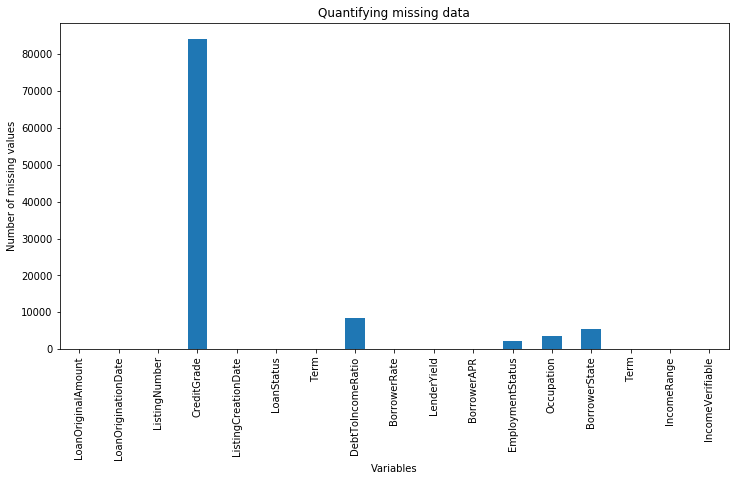

In [18]:

loan2.isnull().sum().plot.bar(figsize=(12,6), color = base_color)
plt.ylabel('Number of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

- A huge percentage of missing data within the selected column is from the DebtToIncomeRatio followed BorrowerState, Occupation and the least empty column-EmploymentStatus

# Employment Status of Customers

In [22]:
plt.figure(figsize = [20,6])
sns.countplot(data = loan2 , x = 'EmploymentStatus', color ="#FF5733");
plt.xlabel('Employment Status')
plt.ylabel('Count Of Customers')
plt.title('Status Of Employment')


TypeError: cannot label index with a null key

In [16]:
#Set/Arrange the plotted bar chart in order of highest occurence
order = loan2['EmploymentStatus'].value_counts().index
plt.figure(figsize = [12,6])
sb.countplot(data = loan2 , x = 'EmploymentStatus', color =base_color, order = order);
plt.xlabel('Employment Status')
plt.xticks (rotation=45)
plt.ylabel('Count Of Customers')
plt.title('Status Of Employment')

TypeError: cannot label index with a null key

**Observation**
- From the above visual, we can see that prospers customer base are majorly "employed"

# Borrower State Spread

In [17]:
plt.figure(figsize = [20,6])
sb.countplot(data = loan2 , x = 'BorrowerState', color = base_color);
plt.xlabel('State')
plt.ylabel('Count Of Customers')
plt.title('Location Distribution')

TypeError: cannot label index with a null key

Text(0.5,1,'Location Distribution')

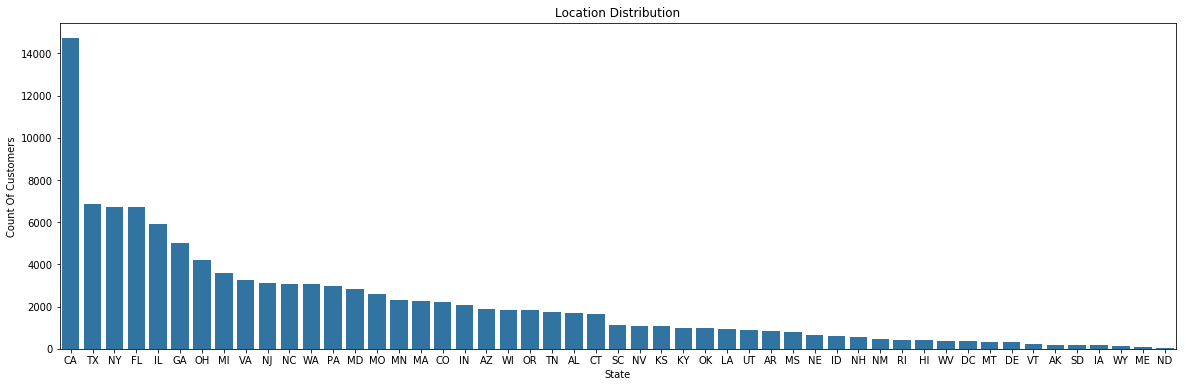

In [14]:
order = loan2['BorrowerState'].value_counts().index
plt.figure(figsize = [20,6])
sb.countplot(data = loan2 , x = 'BorrowerState', color = base_color, order = order);
plt.xlabel('State')
plt.ylabel('Count Of Customers')
plt.title('Location Distribution')

- We can see a huge concentration of prospers customer in one location - **CA**. I would suggest this concentration might be as a result of proper's office location around the same area.

# Highest Credit Rating

Text(0.5,1,'Credit Grade')

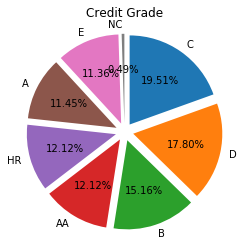

In [23]:
#Using a pie chat to understand the credit score within the dataset
sorted_grade = loan2['CreditGrade'].value_counts()
plt.pie(sorted_grade, labels = sorted_grade.index, startangle = 90, explode=(0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%', counterclock=False)
plt.axis('square')
plt.title('Credit Grade')



# Observation

- The highest credit rating grade is 'c'
- 'HR'&'AA' bears equally the same credit rating
- The lowest credit rating count within the dataset is 'NC' with approximately 0.5%

(-1.1076883227002128,
 1.1010234096085147,
 -1.1009880632302278,
 1.1077236690784997)

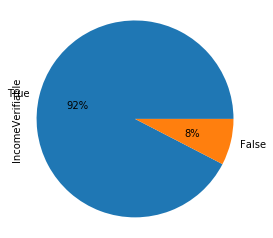

In [28]:
loan2.IncomeVerifiable.value_counts().plot(kind='pie', autopct='%1.0f%%');
plt.axis('square')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the graphs I plotted, the distributions of the variables are or look normal and there weren't any unusual points apart from the discovered missing data that needs to be transformed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# Relationship Between Borrower Rate and Lender Yield

Text(0,0.5,'LenderYield')

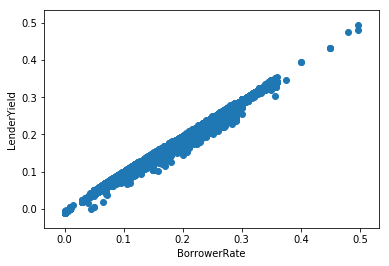

In [8]:
plt.scatter(data = loan2, x = 'BorrowerRate', y = 'LenderYield');
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')

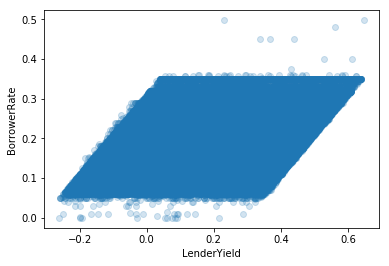

In [16]:
sb.regplot(data = loan2 , x= 'LenderYield' , y = 'BorrowerRate' 
           , fit_reg = False ,x_jitter = 0.3 , scatter_kws = {'alpha' : 1/5});
#lables_name('DebtToIncomeRatio' , 'BorrowerRate')
#loan2 = loan_df[['ListingKey', 'LoanOriginalAmount', 'ListingNumber','CreditGrade','ListingCreationDate','LoanStatus', 'Term', 'DebtToIncomeRatio','BorrowerRate', 'BorrowerAPR', 'EmploymentStatus', 'Occupation', 'BorrowerState']]
#sns.scatterplot(loan2['DebtToIncomeRatio'],loan2['BorrowerRate'],color='darkorange') 

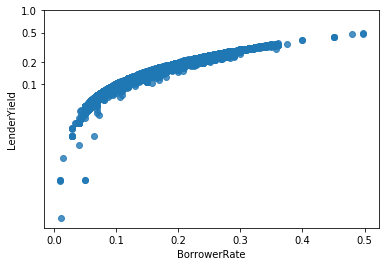

In [24]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(x=loan2['BorrowerRate'], y=loan2['LenderYield'].apply(log_trans))
tick_locs = [0.1, 0.2, 0.5, 1.0]
plt.yticks(log_trans(tick_locs), tick_locs);

# Observation

- The borrower yield and lender rate bears a very strong positive relationship.

In [17]:
#Convert the object for the loan origination date column data type to datetime
loan2['LoanOriginationDate']= pd.to_datetime(loan2['LoanOriginationDate'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# Extract year, month, day, hour, and minute. Assign all these date component to new column.
loan2['Originationyear'] = loan2['LoanOriginationDate'].dt.year
loan2['Originationmonth'] = loan2['LoanOriginationDate'].dt.month
loan2['Originationday'] = loan2['LoanOriginationDate'].dt.day

loan2.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,ListingKey,LoanOriginalAmount,LoanOriginationDate,ListingNumber,CreditGrade,ListingCreationDate,LoanStatus,Term,DebtToIncomeRatio,BorrowerRate,...,BorrowerAPR,EmploymentStatus,Occupation,BorrowerState,Term,IncomeRange,IncomeVerifiable,Originationyear,Originationmonth,Originationday
0,1021339766868145413AB3B,9425,2007-09-12,193129,C,2007-08-26 19:09:29.263000000,Completed,36,0.17,0.158,...,0.16516,Self-employed,Other,CO,36,"$25,000-49,999",True,2007,9,12
1,10273602499503308B223C1,10000,2014-03-03,1209647,NaN,2014-02-27 08:28:07.900000000,Current,36,0.18,0.092,...,0.12016,Employed,Professional,CO,36,"$50,000-74,999",True,2014,3,3


In [11]:
loan2['Term']= loan2['Term'].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Employment Status and Origination Year Comparison

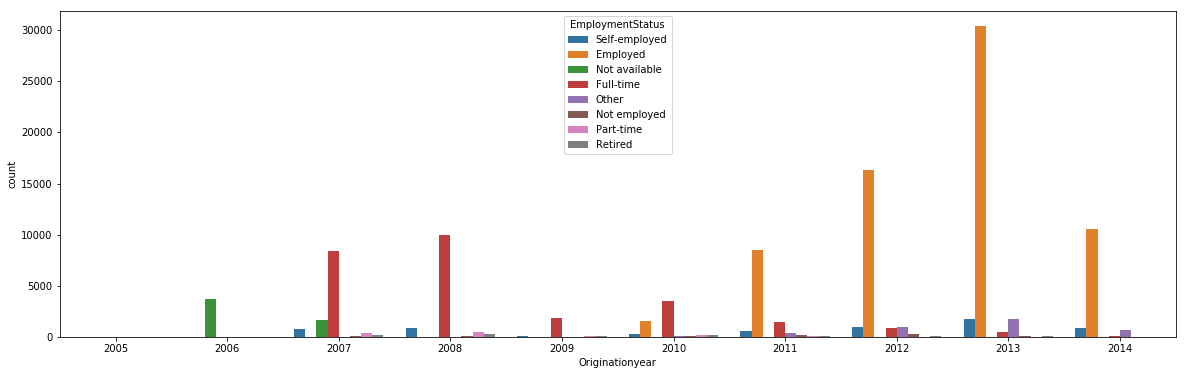

In [19]:
plt.figure(figsize = [20,6])
sns.countplot(loan2['Originationyear'],
              hue=loan2['EmploymentStatus'])

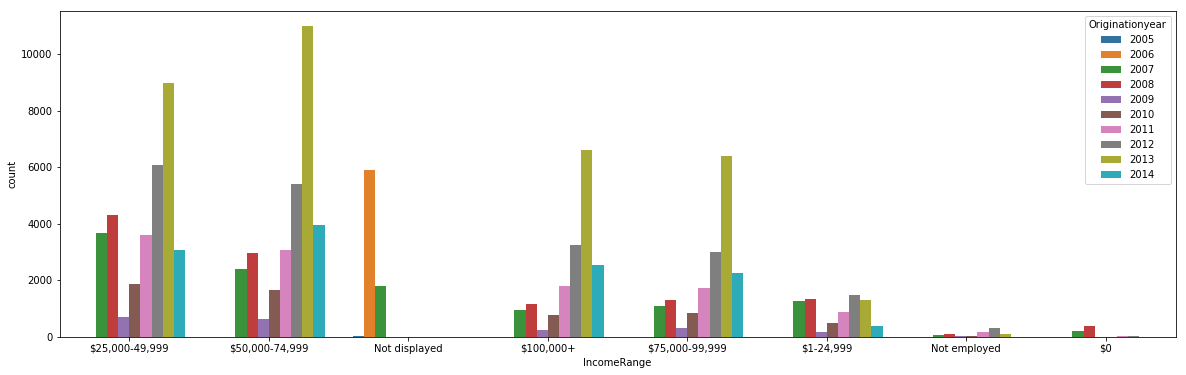

In [20]:
plt.figure(figsize = [20,6])
sns.countplot(loan2['IncomeRange'],
              hue=loan2['Originationyear'])

# Observation



- The buisness gained traction from 2006
- From 2007 -2010, their customers were majorly fulltime employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

